In [182]:
import collections
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
#gets file and returns cleaned up data in df
def clean_data(file_name):
    df =  pd.read_csv(file_name, header=None)
    
    #removing first column since it cntains line number
    df = df.drop(columns=[0])

    #removing nans and replacing them with string empty
    df = df.replace(np.nan, 'empty', regex=True)
    
    return df

In [232]:
#get df and return frequency count of each value
def return_freq_count(df):
    #converting df to 2d array and counting frequency dist
    array_2d = df.values
    frequency_dist = collections.Counter([x for sublist in array_2d for x in sublist])
    
    #removing nan
    del frequency_dist['empty']
    
    return frequency_dist

In [233]:
#get list of frequencies, return list of probabiliteis - pmf
def get_pmf(list_freq):
    total = sum(list_freq)
    get_prob = lambda x: x/total
    pmf = map(get_prob,list_freq)
    return list(pmf)

In [234]:
#create a dictionary from 2 lists
def create_dict(list1, list2):
    return dict(zip(list1,list2))

In [235]:
#set of printable chars
hex_set = set(hex(x)[2:] for x in range(32,126))

#removing non printable characters from dictionary of counts
def remove_non_printable_from_dict(x, hex_set, frequency_dist):
    if not x in hex_set:
        del frequency_dist[x]
        
#converting hex to ascii
convert_2_ascii = lambda x:bytes.fromhex(x).decode('ascii')

In [236]:
#read cleaned out csv data
df_encrypted = clean_data('./data/encrypted_hex_dump_clean.csv')

In [237]:
#get frequency distirbution
frequency_dist_encrypted = return_freq_count(df_encrypted)

In [238]:
fig, ax = plt.subplots(figsize=(20,5))
freq_dist_enc = get_pmf(frequency_dist_encrypted.values())
plt.bar(list(frequency_dist_encrypted.keys()),freq_dist_enc)
fig.canvas.draw()

ax.set_xlabel('Hex Value')
ax.set_ylabel('Probability')
ax.set_title('Encrypted Hex Dump - PMF Of All Hex Values')
plt.show()

In [239]:
#removing non printable characters from encrypted dictionary count
for x in list(frequency_dist_encrypted.keys()):
    remove_non_printable(x, hex_set, frequency_dist_encrypted)

In [240]:
label_x_ascii = map(convert_2_ascii,list(frequency_dist_encrypted.keys()))
label_x_ascii = list(label_x_ascii)

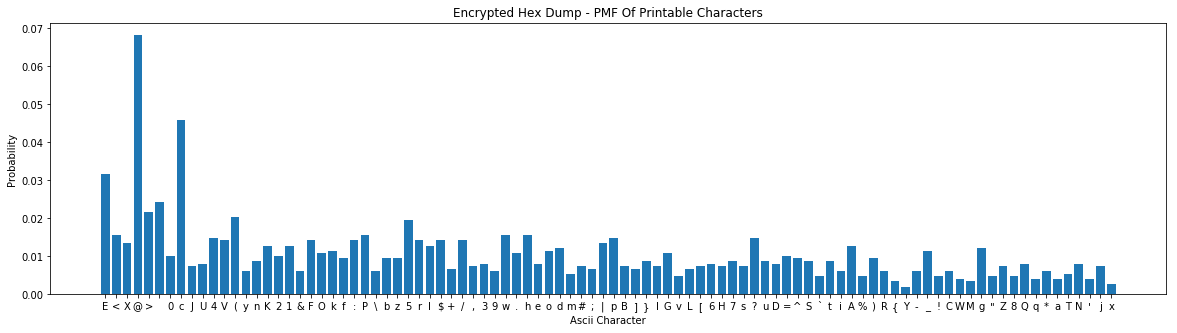

In [241]:
#build histogram using dictionary
fig, ax = plt.subplots(figsize=(20,5))
freq_dist_enc = get_pmf(frequency_dist_encrypted.values())
new_dict_encrypted = create_dict(label_x_ascii,freq_dist_enc)
plt.bar(list(new_dict_encrypted.keys()),freq_dist_enc)
fig.canvas.draw()

ax.set_xlabel('Ascii Character')
ax.set_ylabel('Probability')
ax.set_title('Encrypted Hex Dump - PMF Of Printable Characters')
plt.show()

In [243]:
#read cleaned out csv data
df_unencrypted = clean_data('./data/unencrypted_hex_dump_clean.csv')

In [244]:
#get frequency distribution
frequency_dist_unencrypted = return_freq_count(df_unencrypted)

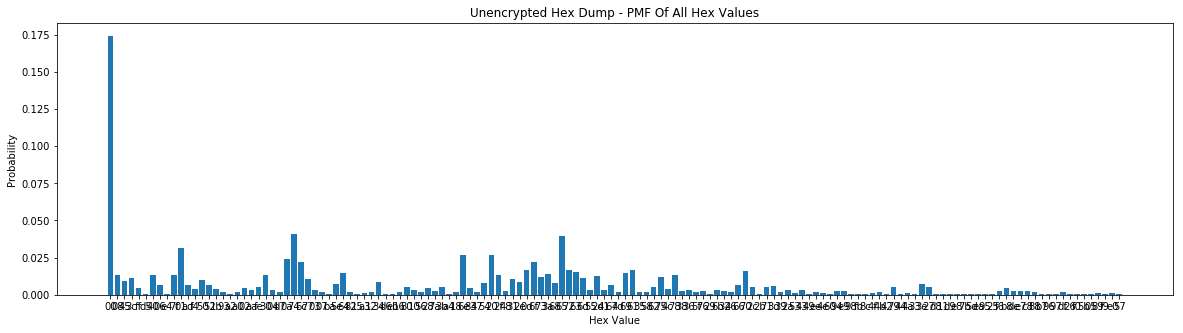

In [245]:
fig, ax = plt.subplots(figsize=(20,5))
freq_dist_unenc = get_pmf(frequency_dist_unencrypted.values())
plt.bar(list(frequency_dist_unencrypted.keys()),freq_dist_unenc)
fig.canvas.draw()

ax.set_xlabel('Hex Value')
ax.set_ylabel('Probability')
ax.set_title('Unencrypted Hex Dump - PMF Of All Hex Values')
plt.show()

In [248]:
#removing non printable characters from unencrypted dictionary count
for x in list(frequency_dist_unencrypted.keys()):
    remove_non_printable(x, hex_set, frequency_dist_unencrypted)

In [249]:
label_x_ascii = map(convert_2_ascii,list(frequency_dist_unencrypted.keys()))
label_x_ascii = list(label_x_ascii)

In [252]:
#build histogram using dictionary
fig, ax = plt.subplots(figsize=(20,5))
freq_dist_unenc = get_pmf(frequency_dist_unencrypted.values())
new_dict_unenc = create_dict(label_x_ascii, freq_dist_unenc)
plt.bar(list(new_dict_unenc.keys()),new_dict_unenc.values())
fig.canvas.draw()

ax.set_xlabel('Ascii Character')
ax.set_ylabel('Probability')
ax.set_title('Unencrypted Hex Dump - PMF Of Printable Characters')
plt.show()